In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('data\online_retail_II.csv',encoding='ISO-8859-1')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Information feature:
+ Invoice: Mã hoá đơn
+ StockCode: Nhãn hàng
+ Description: Mô tả
+ Quantity: số lượng đơn hàng
+ InvoiceDate: Ngày xuất hoá đơn
+ Price: Giá / 1 sản phẩm
+ Customer ID: ID khách hàng
+ Country: Quốc gia đặt hàng


# Analytical Process:
1. Define problem/ASK:
2. Data preparation
3. Data processing: 
    + clean data: wrong data, missing, outlier
    + recode data: encoder/get dummies
4. Data analysis:
    + Descriptive analysis:
        - Quantitative feature: mean, max, min, std, distribution
        - Quanlitative feature: freq, percentage
    + Inferential analysis:
        - Correlation
        - Regression/Classification


# Define problem:
0. Customer:
    + Số lượng khách hàng truy cập và thực hiện mua hàng (coversion: sum, mean)
    + Số người mua bỏ đặt hàng trong quá trình mua (abandonment: Y/N)
    + Số lượng người mua mới ???
    
1. Xác định tổng doanh thu trên:
    + 1 customer (revenue_per_customer): sum,mean
    + Mỗi quốc gia: freq,percentage
    + Mỗi tháng, 6 tháng, năm: freq

2. Xác định số lượng đơn hàng:
    + Theo thời gian: freq, percentage
    + trên mỗi customer: sum
    + trên mỗi quốc gia: freq
    + Số lượng đơn hàng/khách hàng mua mỗi năm/ tháng là bao nhiêu ?? ==> Xác định mô hình doanh nghiệp


# View Data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   CustomerID   406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.rename(columns={'Customer ID':'CustomerID'},inplace=True)

In [ ]:
df[df['Quantity']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [ ]:
df[df['Price']<0]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [ ]:
df.dropna(inplace=True)
df.shape

(406830, 8)

In [ ]:
# Đơn hàng bị huỷ:
df_canceled = df[df['Invoice'].str.startswith('C')]
df_canceled.shape

(8905, 8)

In [ ]:
df_canceled['Quantity'] = abs(df_canceled['Quantity'])
#Lưu file:
df_canceled.to_csv('data/canceled_order.csv')
df_canceled.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10896\1304457942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceled['Quantity'] = abs(df_canceled['Quantity'])


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
141,C536379,D,Discount,1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [ ]:
def data_info(df):
    print("Số lượng khách hàng: ", df["CustomerID"].nunique(),
        '\n ==================================')
    print("Số lượng đơn hàng đã được đặt: ",df['Quantity'].sum(),
        '\n ==================================')
    print("Số hoá đơn đã xuất: ",df['Invoice'].nunique(),
        '\n ==================================')
    print("Số quốc gia đặt hàng: ",df['Country'].nunique(),
        '\n ==================================')
    print("Tổng doanh thu: ",(df['Quantity']*df['Price']).sum().astype(int),
        '\n ==================================')
    print("Số đơn được trả lại: ",df_canceled['Invoice'].nunique(),
        '\n ==================================')
    print("Số lượng sản phẩm: ",df['Description'].nunique(),
        '\n ==================================')

In [ ]:
data_info(df)

Số lượng khách hàng:  4372 
Số lượng đơn hàng đã được đặt:  4906889 
Số hoá đơn đã xuất:  22190 
Số quốc gia đặt hàng:  37 
Tổng doanh thu:  8300083 
Số đơn được trả lại:  3654 
Số lượng sản phẩm:  3896 


In [ ]:
df.sort_values(by='Price',ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom
173277,C551685,POST,POSTAGE,-1,5/3/2011 12:51,8142.75,16029.0,United Kingdom
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.0,United Kingdom
173391,C551699,M,Manual,-1,5/3/2011 14:12,6930.00,16029.0,United Kingdom
268027,C560372,M,Manual,-1,7/18/2011 12:26,4287.63,17448.0,United Kingdom


In [ ]:
df.sort_values(by='Price',ascending=True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
436597,574175,22065,CHRISTMAS PUDDING TRINKET POT,12,11/3/2011 11:47,0.0,14110.0,United Kingdom
314747,564651,22955,36 FOIL STAR CAKE CASES,144,8/26/2011 14:19,0.0,14646.0,Netherlands
314746,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,8/26/2011 14:19,0.0,14646.0,Netherlands
198383,554037,22619,SET OF 6 SOLDIER SKITTLES,80,5/20/2011 14:13,0.0,12415.0,Australia
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom


In [ ]:
df[df['Price'] == 0 ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [ ]:
df['Description'].describe()

count                                 406830
unique                                  3896
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2070
Name: Description, dtype: object

In [ ]:
df.shape

(406830, 8)

+ Bộ số liệu gồm 541910 quan sát và 8 thuộc tính
+ Description và CustomerID là 2 thuộc tính có tồn tại missing cần xử lý
+ Có thể thấy 2 thuộc tính Quantity và Price có các giá trị âm, lý do là các đơn hàng được trả lại hoặc thuộc chương trình discount

# Preparation Data:

LOẠI BỎ MISSING VÀ WRONG DATA:

In [ ]:
df_canceled.dropna(inplace=True)
df_canceled = df_canceled[df_canceled['Quantity']>0]
df_canceled = df_canceled[df_canceled['Price']>0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_10896\4157014896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceled.dropna(inplace=True)


In [ ]:
df_canceled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      8905 non-null   object 
 1   StockCode    8905 non-null   object 
 2   Description  8905 non-null   object 
 3   Quantity     8905 non-null   int64  
 4   InvoiceDate  8905 non-null   object 
 5   Price        8905 non-null   float64
 6   CustomerID   8905 non-null   float64
 7   Country      8905 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 626.1+ KB


In [ ]:
data_info(df_canceled)

Số lượng khách hàng:  1589 
Số lượng đơn hàng đã được đặt:  274808 
Số hoá đơn đã xuất:  3654 
Số quốc gia đặt hàng:  28 
Tổng doanh thu:  611342 
Số đơn được trả lại:  3654 
Số lượng sản phẩm:  1945 


In [ ]:
df.dropna(inplace=True)
df = df[df['Quantity']>0]
df = df[df['Price']>0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      397885 non-null  object 
 1   StockCode    397885 non-null  object 
 2   Description  397885 non-null  object 
 3   Quantity     397885 non-null  int64  
 4   InvoiceDate  397885 non-null  object 
 5   Price        397885 non-null  float64
 6   CustomerID   397885 non-null  float64
 7   Country      397885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
data_info(df)

Số lượng khách hàng:  4338 
Số lượng đơn hàng đã được đặt:  5167813 
Số hoá đơn đã xuất:  18532 
Số quốc gia đặt hàng:  37 
Tổng doanh thu:  8911425 
Số đơn được trả lại:  3654 
Số lượng sản phẩm:  3877 


Format wrong type feature:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      397885 non-null  object 
 1   StockCode    397885 non-null  object 
 2   Description  397885 non-null  object 
 3   Quantity     397885 non-null  int64  
 4   InvoiceDate  397885 non-null  object 
 5   Price        397885 non-null  float64
 6   CustomerID   397885 non-null  float64
 7   Country      397885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['WeekDay']=df['InvoiceDate'].dt.weekday
df['WeekDay'] = df['WeekDay'].replace({0:'Mon', 1:'Tue',2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Year,Month,Day,Hour,WeekDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,Wed
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,Wed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,Wed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,Wed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,Wed


In [ ]:
df['revenue'] = df['Quantity']*df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Year,Month,Day,Hour,WeekDay,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,Wed,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,Wed,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,Wed,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,Wed,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,Wed,20.34


# EDA:

Trung bình mỗi tháng có:  397524.08 sản phẩm bán ra 
Trung bình mỗi tháng có:  30606.54 loại sản phẩm bán ra


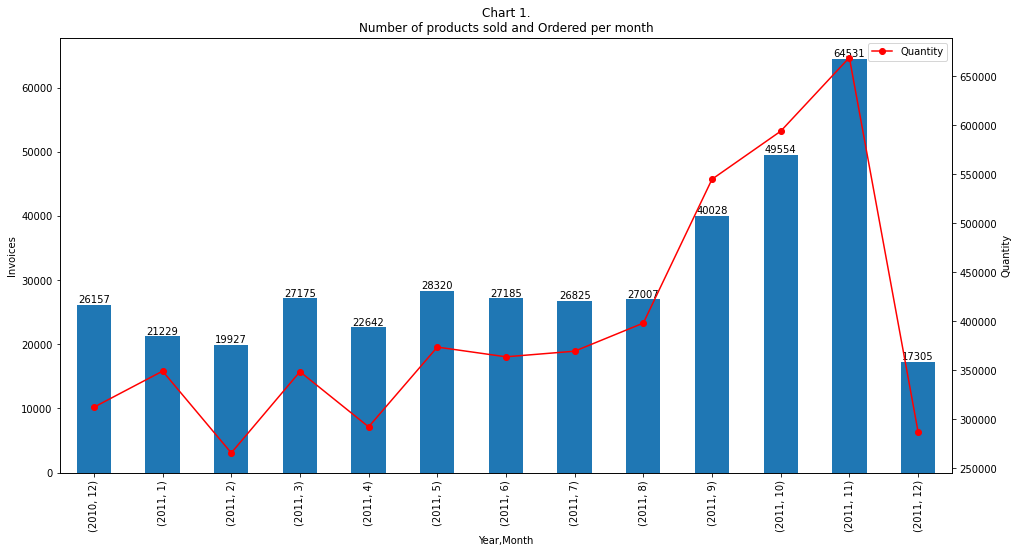

In [ ]:
ax = df.groupby(['Year','Month']).Invoice.count().plot(kind='bar',
        title='Chart 1.\nNumber of products sold and Ordered per month',figsize=(16,8))
ax.bar_label(ax.containers[0])

ax2 = plt.gca()
ax2 = ax.twinx()
ax2 = df.groupby(['Year','Month']).Quantity.sum().plot(kind='line',
        marker='o',c='r',label='Quantity')

plt.legend()
ax.set_ylabel('Invoices')
ax2.set_ylabel('Quantity')

print('Trung bình mỗi tháng có: ',df.groupby(['Year','Month']).Quantity.sum().mean().round(2),'sản phẩm bán ra',
       '\n===================================================' )
print('Trung bình mỗi tháng có: ',df.groupby(['Year','Month']).Invoice.count().mean().round(2),'loại sản phẩm bán ra')

Text(0, 0.5, 'Revenue')

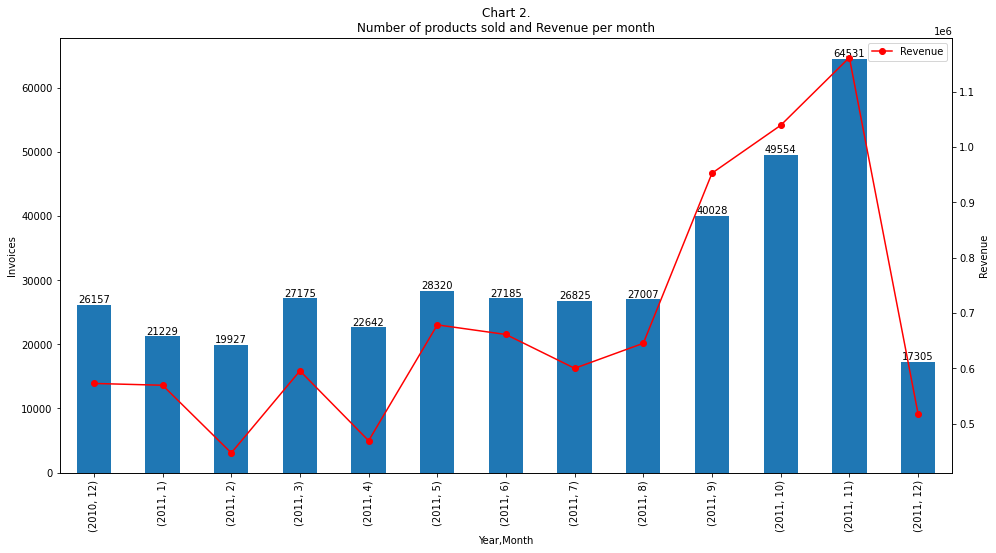

In [ ]:
ax = df.groupby(['Year','Month']).Invoice.count().plot(kind='bar',
        title='Chart 2.\nNumber of products sold and Revenue per month',figsize=(16,8))
ax.bar_label(ax.containers[0])

ax2 = plt.gca()
ax2 = ax.twinx()
ax2 = df.groupby(['Year','Month']).revenue.sum().plot(kind='line',
        marker='o',c='r',label='Revenue')

plt.legend()
ax.set_ylabel('Invoices')
ax2.set_ylabel('Revenue')

**Chart 1:**
+ Số sản phẩm và số lượng sản phẩm được order có xu hướng tăng từ tháng 12/2010 - 11/2011, giảm mạnh đột ngột vào tháng cuối năm 12/2011
+ Tháng 11 là tháng có lượng sản phẩm và lượng đặt hàng lớn nhất trong năm
+ Tháng 2 là tháng có lượng đặt hàng thấp nhất trong năm
+ Tháng 12 là tháng có số sản phẩm được bán ra thấp nhất

**Chart 2.**
+ Số sản phẩm bán ra và doanh thu có xu hướng tăng từ tháng 12/2010 - 11/2011, giảm mạnh đột ngột vào tháng cuối năm 12/2011
+ Tháng 11 là tháng có doanh thu lớn nhất trong năm
+ Tháng 2 là tháng có doanh thu thấp nhất trong năm
+ Tháng 2/2011 và tháng 4/2011 là 2 tháng có số sản phẩm bán ra được duy trì tuy nhiên sô lượng đặt hàng lại thấp hơn, do đó doanh thu cũng giảm so với tháng trước đó

Trung bình mỗi tháng có:  1004.15 khách hàng 
Trung bình mỗi tháng có:  397524.08 sản phẩm bán ra


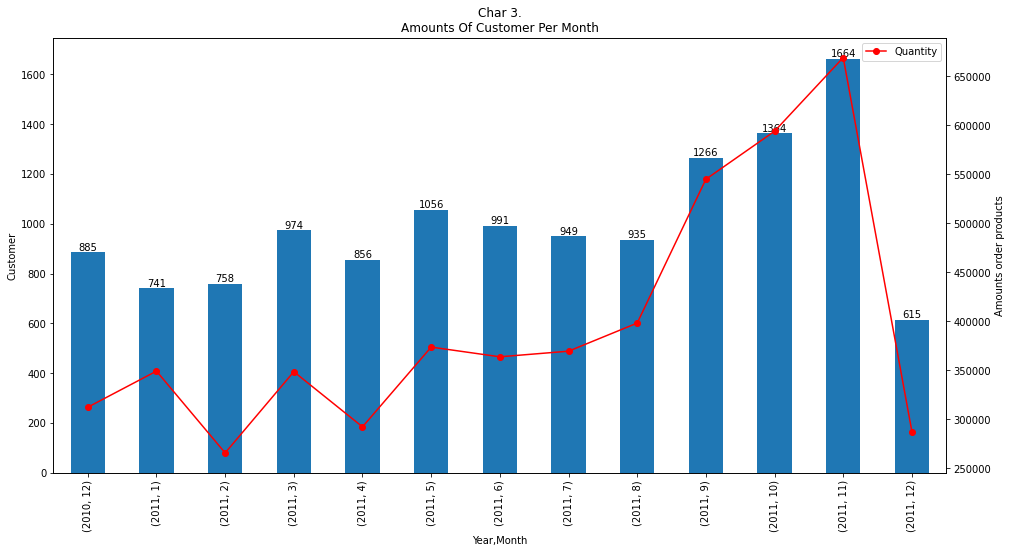

In [ ]:
ax = df.groupby(['Year','Month']).CustomerID.nunique().plot(kind='bar',
        title='Char 3.\nAmounts Of Customer Per Month',figsize=(16,8))
ax.bar_label(ax.containers[0])

ax2 = plt.gca()
ax2 = ax.twinx()
ax2 = df.groupby(['Year','Month']).Quantity.sum().plot(kind='line',
        marker='o',c='r',label='Quantity')

plt.legend()
ax.set_ylabel('Customer')
ax2.set_ylabel('Amounts order products')

print('Trung bình mỗi tháng có: ',df.groupby(['Year','Month']).CustomerID.nunique().mean().round(2),'khách hàng',
'\n===================================================')
print('Trung bình mỗi tháng có: ',df.groupby(['Year','Month']).Quantity.sum().mean().round(2),'sản phẩm bán ra')

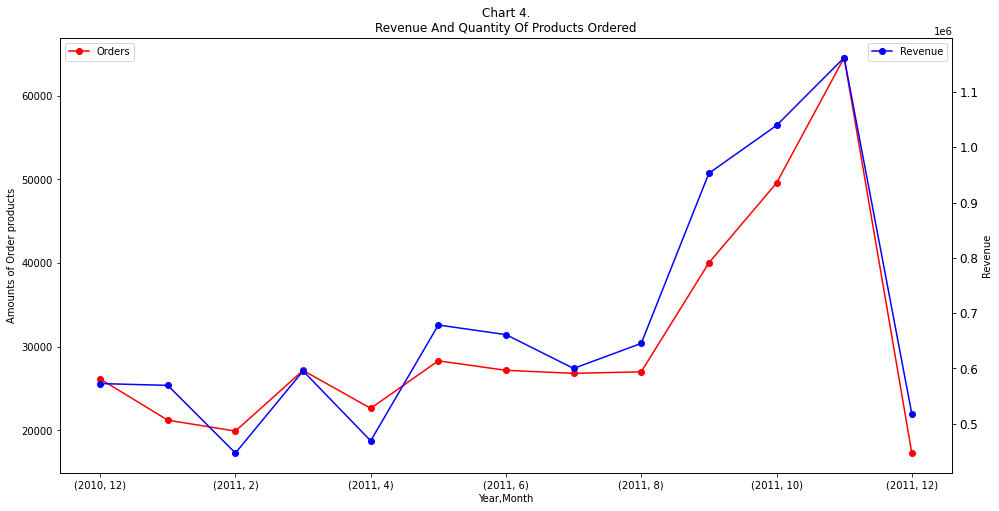

In [ ]:
ax = df.groupby(['Year','Month']).Invoice.count().plot(kind='line',
        marker='o',c='r',label='Orders',figsize=(16,8))
plt.legend(loc='upper left')
ax2 = plt.gca()
ax2 = ax.twinx()
ax2 = df.groupby(['Year','Month']).revenue.sum().plot(kind='line',
        marker='o',c='b',label='Revenue')

plt.title('Chart 4.\nRevenue And Quantity Of Products Ordered')

plt.xticks(fontsize = 12, rotation = 'horizontal')
plt.yticks(fontsize = 12)
ax.set_ylabel('Amounts of Order products')
ax2.set_ylabel('Revenue')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Tính thời gian bắt đầu mua hàng:
df_new_customer = df.groupby(['CustomerID'])['InvoiceDate'].min().reset_index()
# new customer năm 2011:
df_new_customer_2011 = df_new_customer[df_new_customer['InvoiceDate']>'2010-12-31 00:00:00']
# New customer mỗi tháng
df_new_customer_2011['Month'] = df_new_customer_2011['InvoiceDate'].dt.month
new_customer_2011 = df_new_customer_2011.groupby(['Month'])['CustomerID'].count().reset_index()
new_customer_2011.rename(columns={'CustomerID':'new_customer'},inplace=True)
new_customer_2011

C:\Users\Admin\AppData\Local\Temp\ipykernel_10896\3968846192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_customer_2011['Month'] = df_new_customer_2011['InvoiceDate'].dt.month


,Month,new_customer
0,1,417
1,2,380
2,3,452
3,4,300
4,5,284
5,6,242
6,7,188
7,8,169
8,9,299
9,10,358


In [ ]:
df_existing_customer = df.groupby(['Month'])['CustomerID'].nunique().reset_index()
df_existing_customer.rename(columns={'CustomerID':'total_cus'},inplace=True)
df_existing_customer['new_cus'] = new_customer_2011['new_customer']
df_existing_customer['exis_cus'] = df_existing_customer['total_cus'] - df_existing_customer['new_cus'] 
df_existing_customer.head()

,Month,total_cus,new_cus,exis_cus
0,1,741,417,324
1,2,758,380,378
2,3,974,452,522
3,4,856,300,556
4,5,1056,284,772


 Tổng số khách hàng trong năm 2011:  4338 
Khách hàng mới trong năm 2011:  885 


Text(0.5, 0, 'Month')

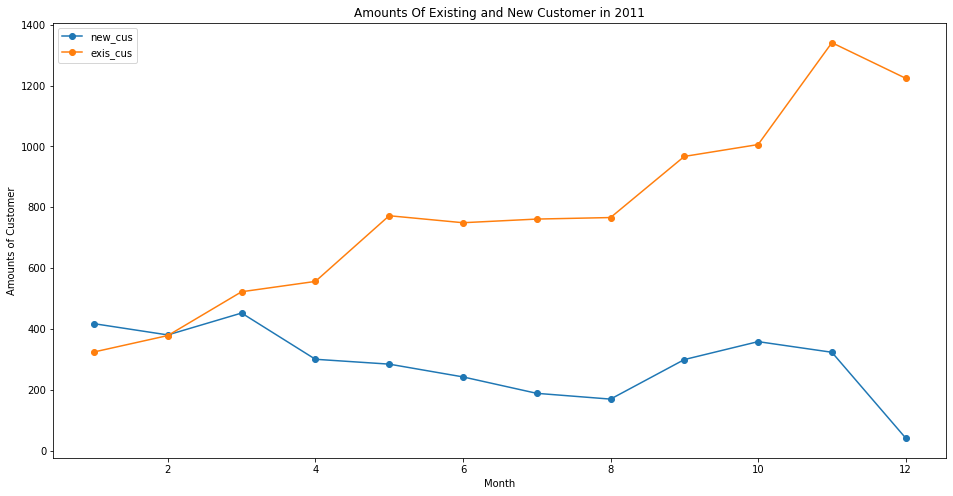

In [ ]:
print('==============================================\n','Tổng số khách hàng trong năm 2011: ',
    df_new_customer.shape[0],
    '\n=============================================='
)

print('Khách hàng mới trong năm 2011: ',
    df_new_customer.shape[0] - df_new_customer_2011.shape[0],
    '\n=============================================='
)

df_existing_customer.plot(kind='line',x='Month',y=['new_cus','exis_cus'],marker = 'o',figsize=(16,8))

plt.title('Amounts Of Existing and New Customer in 2011')
plt.ylabel('Amounts of Customer')
plt.xlabel('Month')


In [ ]:
df_existing_customer['new_exis_ratio'] = df_existing_customer['new_cus']/df_existing_customer['exis_cus']
df_existing_customer['new_exis_ratio'] =df_existing_customer['new_exis_ratio'].round(2)

Text(0, 0.5, 'Ratio')

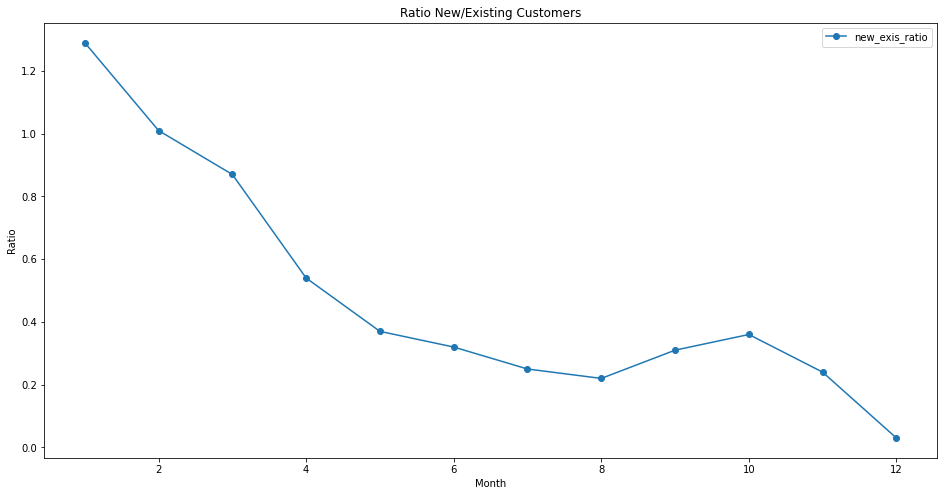

In [ ]:
df_existing_customer.plot(x='Month',y='new_exis_ratio',kind='line',rot=0,marker='o',figsize=(16,8))
plt.title('Ratio New/Existing Customers')
plt.ylabel('Ratio')

In [ ]:
df_existing_customer.to_csv('new_existing_customers.csv')

Có thể nhận thấy mối liên quan thuận giữa doanh thu và số lượng sản phẩm được bán qua các tháng

[Text(0, 0, '80995'),
 Text(0, 0, '77916'),
 Text(0, 0, '54415'),
 Text(0, 0, '46181'),
 Text(0, 0, '36725')]

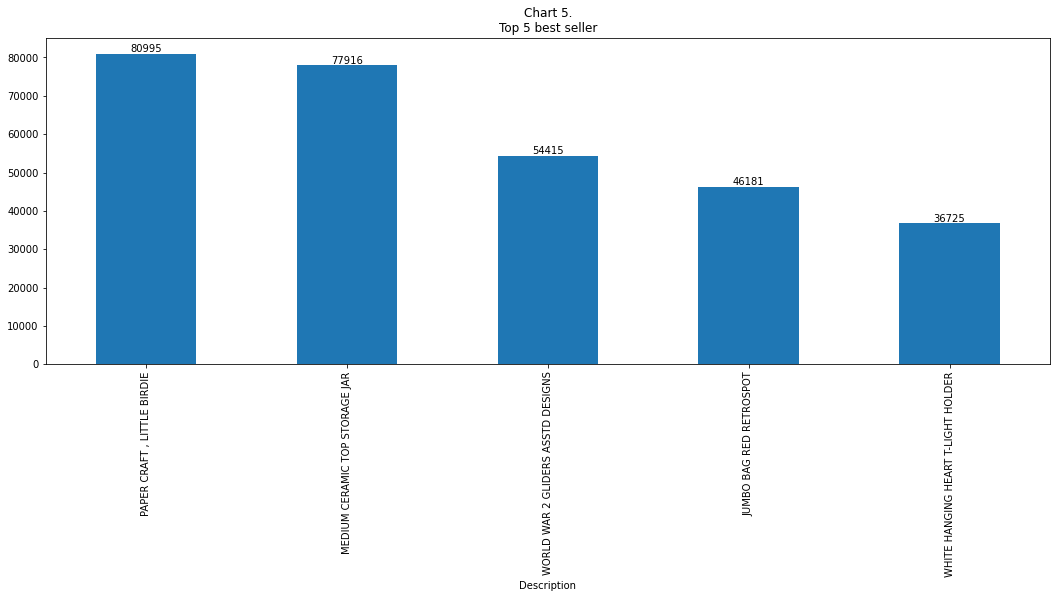

In [ ]:
ax = df.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(5).plot(kind='bar',
    title='Chart 5.\nTop 5 best seller',figsize=(18,6))
ax.bar_label(ax.containers[0])


[Text(0, 0, '168470'),
 Text(0, 0, '142593'),
 Text(0, 0, '100448'),
 Text(0, 0, '85220.8'),
 Text(0, 0, '81416.7')]

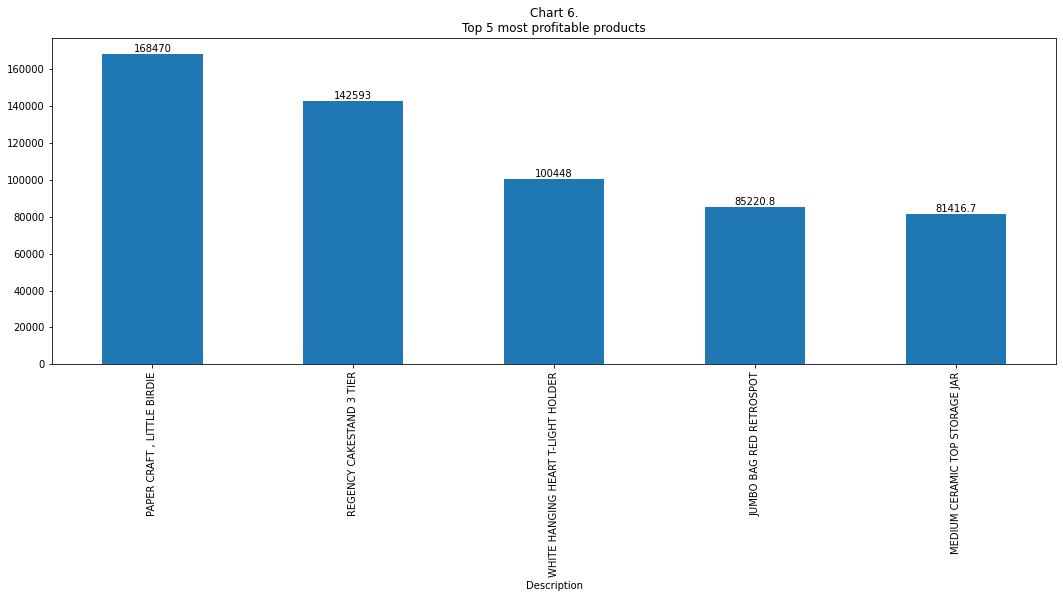

In [ ]:
ax = df.groupby("Description")["revenue"].sum().sort_values(ascending = False).head(5).plot(kind='bar',
    title='Chart 6.\nTop 5 most profitable products',figsize=(18,6))
ax.bar_label(ax.containers[0])

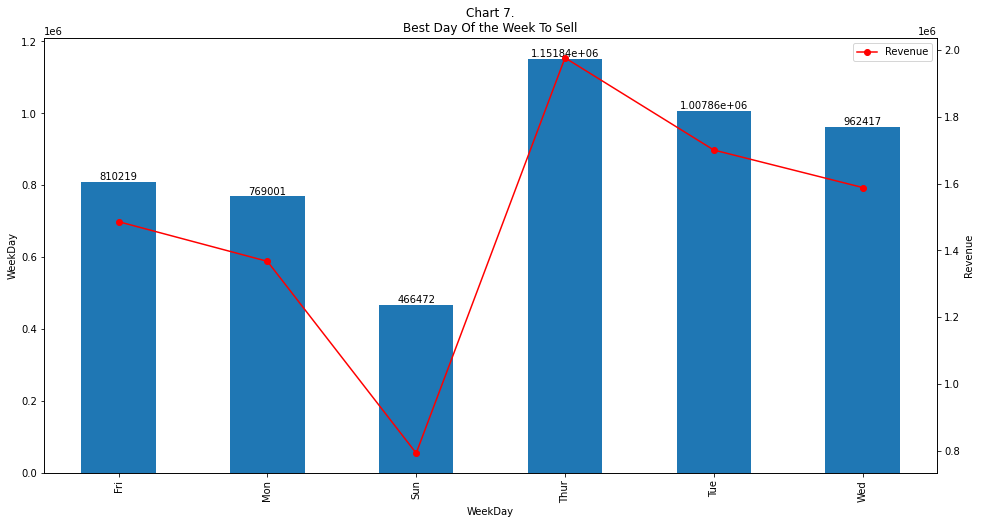

In [ ]:
ax = df.groupby(['WeekDay']).Quantity.sum().plot(kind='bar',
        title='Chart 7.\nBest Day Of the Week To Sell',figsize=(16,8))
ax.bar_label(ax.containers[0])

ax2 = plt.gca()
ax2 = ax.twinx()
ax2 = df.groupby(['WeekDay']).revenue.sum().plot(kind='line',
        marker='o',c='r',label='Revenue')

plt.legend()
ax.set_ylabel('WeekDay')
ax2.set_ylabel('Revenue')
plt.show()

[Text(0, 0, '1'),
 Text(0, 0, '379'),
 Text(0, 0, '8690'),
 Text(0, 0, '21944'),
 Text(0, 0, '37997'),
 Text(0, 0, '49084'),
 Text(0, 0, '72066'),
 Text(0, 0, '64026'),
 Text(0, 0, '54118'),
 Text(0, 0, '45369'),
 Text(0, 0, '24089'),
 Text(0, 0, '13071'),
 Text(0, 0, '2928'),
 Text(0, 0, '3321'),
 Text(0, 0, '802')]

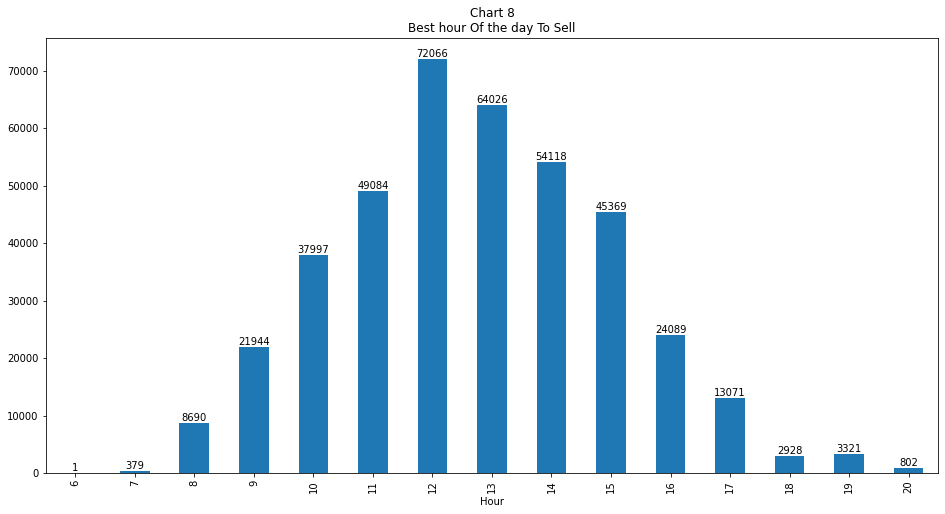

In [ ]:
ax = df.groupby(['Hour']).Invoice.count().plot(kind='bar',
        title='Chart 8\nBest hour Of the day To Sell',figsize=(16,8))
ax.bar_label(ax.containers[0])


+ Thứ 5 trong tuần là ngày mà khách hàng đặt hàng nhiều nhất
+ Khung giờ đặt hàng nhiều nhất là từ 12-13h

[Text(0, 0, '354321'),
 Text(0, 0, '9040'),
 Text(0, 0, '8342'),
 Text(0, 0, '7236'),
 Text(0, 0, '2484'),
 Text(0, 0, '2359'),
 Text(0, 0, '2031'),
 Text(0, 0, '1841'),
 Text(0, 0, '1462'),
 Text(0, 0, '1182')]

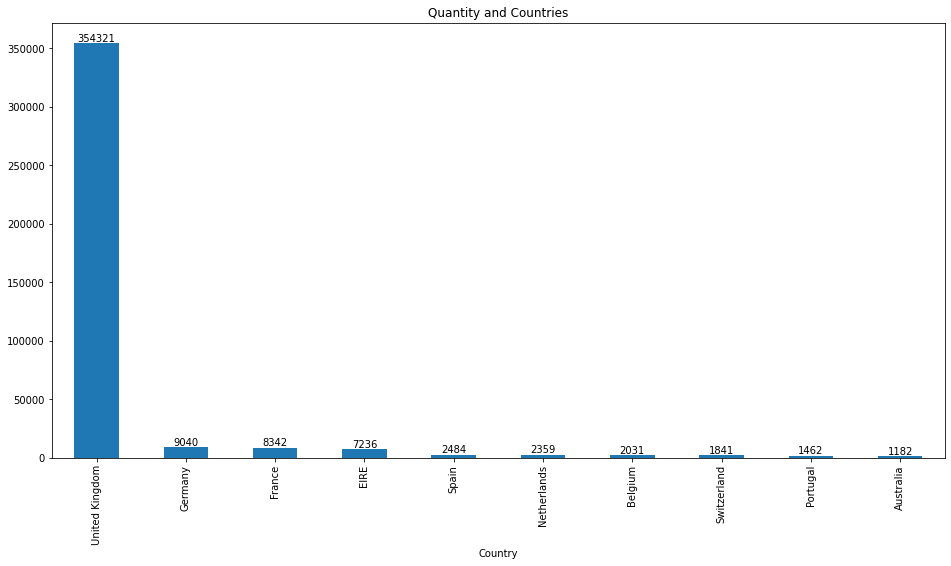

In [ ]:
ax = df.groupby(['Country']).Invoice.count().sort_values(ascending=False).head(10).plot(
    kind='bar',figsize=(16,8),title='Quantity and Countries'
)
ax.bar_label(ax.containers[0])

In [44]:
df.to_csv('data/retailonline-analysis.csv')